In [3]:
#!pip install textblob
#!pip install wordcloud


     |████████████████████████████████| 645kB 3.2MB/s eta 0:00:01


In [1]:
import numpy as np
import pandas as pd
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pygal
from textblob import TextBlob




In [5]:
#read the reviews file
df = pd.read_csv("filtered_reviews_1000.csv")

#select biz_id (change the biz id)
biz = df[df['business_id'] == 'f_eiOrEcMnkHB7GvQVOHkQ']

#split and removing punctuation from the text
all_biz = biz['text'].str.split(' ')
#joing the text records and build Corpus
all_biz_cleaned = []
for text in all_biz:
    text = [x.strip(string.punctuation) for x in text]
    all_biz_cleaned.append(text)
    
all_biz_cleaned[0]
text_biz = [" ".join(text) for text in all_biz_cleaned]

final_text_biz = " ".join(text_biz)


In [6]:
#classify sentiment 
pos_sen = []
neg_sen = []

for sen_text in text_biz:
    zen = TextBlob(sen_text)
    if zen.sentiment.polarity >= 0.0:
        pos_sen.append(sen_text)
    else:
        neg_sen.append(sen_text)

final_pos_sen = " ".join(pos_sen) 
final_neg_sen = " ".join(neg_sen) 

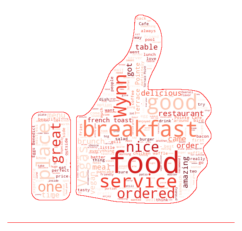

In [7]:
# wordcloud image generate
img_mask=np.array(Image.open("Picture1.png"))
stopwords = set(STOPWORDS)
stopwords.update(["a","the", "bit", "day", "us", "made", "make","is","they","he","she"])

wordcloud = WordCloud(stopwords=stopwords, contour_width=1, contour_color="red",background_color="white", colormap="Reds", max_words=300, mask=img_mask).generate(final_pos_sen)

#Green color for another
#wordcloud = WordCloud(stopwords=stopwords, contour_width=1, contour_color="red",background_color="white", colormap="Reds", max_words=300, mask=img_mask).generate(final_pos_sen)


plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

#saved in the current path
wordcloud.to_file("wordcloud_pos1.png")



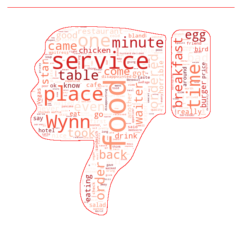

In [8]:
# wordcloud image generate_negative review
img_mask=np.array(Image.open("Picture2.png"))
stopwords = set(STOPWORDS)
stopwords.update(["a","the", "bit", "day", "us", "made", "make","is","they","he","she"])

wordcloud = WordCloud(stopwords=stopwords, contour_width=1, contour_color="red",background_color="white", colormap="Reds", max_words=300, mask=img_mask).generate(final_neg_sen)

#green color for another
#wordcloud = WordCloud(stopwords=stopwords, contour_width=1, contour_color="green",background_color="white", colormap="Greens", max_words=300, mask=img_mask).generate(final_neg_sen)





plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

#saved in the current path
wordcloud.to_file("wordcloud_neg01.png")



In [206]:
#To implement interactive radar chart

In [207]:
import pygal
from pygal.style import Style

In [246]:
custom_style = Style(
  background='transparent',
  plot_background='transparent',
  opacity='.6',
  opacity_hover='.9',
  transition='400ms ease-in',
  colors=('#28B463' , '#E74C3C'))

In [247]:
#Radar chart
radar_chart = pygal.Radar(title='Customer Rating Summary', width=500, height=400, style=custom_style)
radar_chart.x_labels = ['stars','environment', 'value', 'taste', 'food', 'service', 'feeling']
radar_chart.add('Restaurant 1', [4.5,  3.88, 3.5, 4, 3.86, 3.75, 3.77])
radar_chart.add('Restaurant 2', [4.0,  3.49, 3.44, 3.87, 3.6, 3.61,3.34])

#saved in the current path
radar_chart.render_to_file("radar-basic.svg")